# **Poyecto 1, Mineria de datos** 

Grupo 7

Juan Sebastian Ruiz Caro 

Yibby Daniela Gonzalez Forero 
 
 **1. Descripción de la base:**
  
> La base seleccionada se tomó de UCI Machine Learning Repository, fue creada en 1987 tomando información de automóviles importados de 1985 del Anuario automotriz de Ward´s, manuales de automóviles de la oficina de servicios de seguros Water Street de New York y de informes de colisión del instituto de seguros para la seguridad en las carreteras en Washington DC.
Este data set contiene 204 observaciones y 26 atributos, de los cuales 15 son continuos, uno es discreto y 10 son cualitativos. Dichas variables presentan características que describen la composición de un automóvil, como lo es el tipo combustible que usa, la marca, longitud, ancho, precio, entre otros. 

**2.  Escenarios de solución en minería de datos**

> La aplicación de esta base es principalmente para la solución de un problema de aprendizaje supervisado, puesto que se busca estimar el precio de los automóviles basándose en las diferentes características que componen cada observación, esto se realizó por medio de una regresión lineal en comparación de un algoritmo del vecino más cercano. Se seleccionó la base de automóviles por el interés de conocer el comportamiento de los vehículos y los términos familiarizados en la medición de las variables. 


# **3. Análisis exploratorio**

In [6]:
! pip install altair vega_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [8]:
!pip install -U -q PyDrive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df_Aut = pd.read_excel('/content/drive/MyDrive/2022-2/Mineria de datos/Colab proyecto 1/Automoviles.xlsx', 
                 dtype={
                     'Simbolizacion': str
                 })
df_Aut.head()

Simbolizacion  perdidas        marca tipo de combustible aspiracion  \
0             3       122  alfa-romero                 gas        std   
1             1       122  alfa-romero                 gas        std   
2             2       164         audi                 gas        std   
3             2       164         audi                 gas        std   
4             2       122         audi                 gas        std   

  numero de puestas estilo de carroceria ruedas motrices ubicacion del motor  \
0               two          convertible             rwd               front   
1               two            hatchback             rwd               front   
2              four                sedan             fwd               front   
3              four                sedan             4wd               front   
4               two                sedan             fwd               front   

   distancia entre ejes  ...  tamaño del motor  sistema de combustible  \
0                  88.6  ...               130                    mpfi   
1                  94.5  ...               152                    mpfi   
2                  99.8  ...               109                    mpfi   
3                  99.4  ...               136                    mpfi   
4                  99.8  ...               136                    mpfi   

   diametro  carrera relacion de compresion caballos de fuerza  rmp pico  \
0      3.47     2.68                    9.0              111.0    5000.0   
1      2.68     3.47                    9.0              154.0    5000.0   
2      3.19     3.40                   10.0              102.0    5500.0   
3      3.19     3.40                    8.0              115.0    5500.0   
4      3.19     3.40                    8.5              110.0    5500.0   

  millas por galon   carretera   precio  
0                21         27  16500.0  
1                19         26  16500.0  
2                24         30  13950.0  
3                18         22  17450.0  
4                19         25  15250.0  

[5 rows x 26 columns]

In [11]:
df_Aut.columns

Index(['Simbolizacion', 'perdidas', 'marca', 'tipo de combustible',
       'aspiracion', 'numero de puestas', 'estilo de carroceria',
       'ruedas motrices', 'ubicacion del motor', 'distancia entre ejes',
       'longitud', 'ancho', 'altura', 'peso en orden de marcha',
       'tipo de motor', 'numero de cilindros', 'tamaño del motor',
       'sistema de combustible', 'diametro', 'carrera',
       'relacion de compresion', 'caballos de fuerza', 'rmp pico',
       'millas por galon ', 'carretera', 'precio'],
      dtype='object')

In [12]:
df_cuali = df_Aut.loc[:,['Simbolizacion','marca', 'tipo de combustible',
       'aspiracion', 'numero de puestas', 'estilo de carroceria',
       'ruedas motrices', 'ubicacion del motor','tipo de motor', 'numero de cilindros','sistema de combustible']]
df_cuali.head()

Simbolizacion        marca tipo de combustible aspiracion numero de puestas  \
0             3  alfa-romero                 gas        std               two   
1             1  alfa-romero                 gas        std               two   
2             2         audi                 gas        std              four   
3             2         audi                 gas        std              four   
4             2         audi                 gas        std               two   

  estilo de carroceria ruedas motrices ubicacion del motor tipo de motor  \
0          convertible             rwd               front          dohc   
1            hatchback             rwd               front          ohcv   
2                sedan             fwd               front           ohc   
3                sedan             4wd               front           ohc   
4                sedan             fwd               front           ohc   

  numero de cilindros sistema de combustible  
0                four                   mpfi  
1                 six                   mpfi  
2                four                   mpfi  
3                five                   mpfi  
4                five                   mpfi

### **Análisis de variables conjuntas**

Con la finalidad de examinar las relaciones que existen entre las variables cualitativas, se procede a, por medio de la prueba Chi-cuadrado, contrastar para los pares de variables la siguiente hipótesis:

$$
\left\{
\begin{array}{ll}
H_{0}: &  Las \thinspace \thinspace variables \thinspace \thinspace son \thinspace \thinspace independientes\\
H_{1}: & Las \thinspace \thinspace variables \thinspace \thinspace no \thinspace \thinspace son \thinspace \thinspace independientes
\end{array}
\right.
$$

Con la cual, se busca concluir si las variables tienen algún tipo de relación, o por lo contrario, son independientes, cada uno de estos contrastes se realiza a un nivel de significancia del $1$%

In [13]:
nombres_cuali = list(df_cuali.columns)

In [14]:
from itertools import combinations
from  scipy.stats import chi2_contingency

In [15]:
Pares = list(combinations(nombres_cuali, 2))

In [16]:
p_valores = []

In [17]:
for i in range(55):
  Conjunta = pd.crosstab(df_cuali[Pares[i][0]], df_cuali[Pares[i][1]])
  kf = chi2_contingency(Conjunta)
  p_valores.append(round(kf[1], 5))

In [18]:
((pd.DataFrame(p_valores) < 0.01)*1).sum(axis = 0)

0    32
dtype: int64

In [19]:
tabla_1 = pd.DataFrame(Pares)

In [20]:
tabla_1['p valores'] = p_valores


In [21]:
df_pvalores = pd.DataFrame(p_valores)

In [22]:
df_pvalores[df_pvalores < 0.01] = 'relacionados' 

In [23]:
df_pvalores[df_pvalores != 'relacionados'] = 'independientes' 

In [24]:
df_pvalores.value_counts()

relacionados      32
independientes    23
dtype: int64

In [25]:
tabla_1['decision'] = df_pvalores

In [26]:
tabla_1

0                       1  p valores        decision
0          Simbolizacion                   marca    0.00000    relacionados
1          Simbolizacion     tipo de combustible    0.01278  independientes
2          Simbolizacion              aspiracion    0.03047  independientes
3          Simbolizacion       numero de puestas    0.00000    relacionados
4          Simbolizacion    estilo de carroceria    0.00000    relacionados
5          Simbolizacion         ruedas motrices    0.00004    relacionados
6          Simbolizacion     ubicacion del motor    0.00087    relacionados
7          Simbolizacion           tipo de motor    0.00001    relacionados
8          Simbolizacion     numero de cilindros    0.00188    relacionados
9          Simbolizacion  sistema de combustible    0.00000    relacionados
10                 marca     tipo de combustible    0.00055    relacionados
11                 marca              aspiracion    0.00007    relacionados
12                 marca       numero de puestas    0.01443  independientes
13                 marca    estilo de carroceria    0.00006    relacionados
14                 marca         ruedas motrices    0.00000    relacionados
15                 marca     ubicacion del motor    0.00000    relacionados
16                 marca           tipo de motor    0.00000    relacionados
17                 marca     numero de cilindros    0.00000    relacionados
18                 marca  sistema de combustible    0.00000    relacionados
19   tipo de combustible              aspiracion    0.00000    relacionados
20   tipo de combustible       numero de puestas    0.01479  independientes
21   tipo de combustible    estilo de carroceria    0.04081  independientes
22   tipo de combustible         ruedas motrices    0.15691  independientes
23   tipo de combustible     ubicacion del motor    1.00000  independientes
24   tipo de combustible           tipo de motor    0.00494    relacionados
25   tipo de combustible     numero de cilindros    0.09311  independientes
26   tipo de combustible  sistema de combustible    0.00000    relacionados
27            aspiracion       numero de puestas    0.59201  independientes
28            aspiracion    estilo de carroceria    0.84929  independientes
29            aspiracion         ruedas motrices    0.08204  independientes
30            aspiracion     ubicacion del motor    0.94690  independientes
31            aspiracion           tipo de motor    0.10390  independientes
32            aspiracion     numero de cilindros    0.03176  independientes
33            aspiracion  sistema de combustible    0.00000    relacionados
34     numero de puestas    estilo de carroceria    0.00000    relacionados
35     numero de puestas         ruedas motrices    0.29614  independientes
36     numero de puestas     ubicacion del motor    0.15672  independientes
37     numero de puestas           tipo de motor    0.03210  independientes
38     numero de puestas     numero de cilindros    0.12696  independientes
39     numero de puestas  sistema de combustible    0.00664    relacionados
40  estilo de carroceria         ruedas motrices    0.00153    relacionados
41  estilo de carroceria     ubicacion del motor    0.00000    relacionados
42  estilo de carroceria           tipo de motor    0.12100  independientes
43  estilo de carroceria     numero de cilindros    0.21337  independientes
44  estilo de carroceria  sistema de combustible    0.03189  independientes
45       ruedas motrices     ubicacion del motor    0.07291  independientes
46       ruedas motrices           tipo de motor    0.00000    relacionados
47       ruedas motrices     numero de cilindros    0.00000    relacionados
48       ruedas motrices  sistema de combustible    0.00000    relacionados
49   ubicacion del motor           tipo de motor    0.00000    relacionados
50   ubicacion del motor     numero de cilindros    0.00085    relacionados
51   ubicacion del motor  sistema de combustible    0.82083  independie

De los resultados encontrados, se concluye que, de las 53 comparaciones posibles que se realizaron entre los pares de variables, existe relación de algún tipo entre 32 pares de variables, en contraparte, hay 23 pares de variable para las cuales no existe ningún tipo de relación, es decir son independientes.

A continuación se presentan las asociaciones de cada una de las variables cualitvativas:

- La simbolización del automovil esta relacionado con todas las variables cualitativas menos con la aspiración y tipo de combustible. 

- La marca del automovil presenta relacion con todas las variables cualitativas en estudio menos con el número de puertas, es decir, independientemente del numero de puertas que tenga el auto movil la marca de este podria ser cualquiera.

- El tipo de combustible esta relacionado unicamente con
la aspiración, tipo de motor, el sistema de combustible y marca.

- La aspiración solo presenta relación con el sistema de combustible, tipo de combustible, marca.

- El tipo de combustible esta relacionado unicamente con
la aspiración, tipo de motor y el sistema de combustible, marca.

- La aspiración solo presenta relación con el sistema de combustible, tipo de combustible y marca.

- el número de puertas tipo algo tipo de asociación con el estilo de carroceria, sistema de combustible y simbolizacion.

- Estilo de carroceria tiene relacion con ruedas motrices,
ubicacion del motor, numero de puertas, marca y simbolizacion.

- Ruedas motrices tiene relación con todas las variable menos con ubicacion del motor, numero de puertas, aspiracion y tipo de combustible.

- Ubicacion del motor tiene relacion unicamente con tipo de motor, número
de cilindros, estilo de carroceria, marca, simbolizacion.

- Tipo de motor esta relacionado con todas las variables menos con tipo de motor, numero de puertas y aspiracion.

- numero de cilindros tiene relacion unicamente con simbolizacion, marca, ruedas
motrices, ubicacion del motor y tipo de motor.




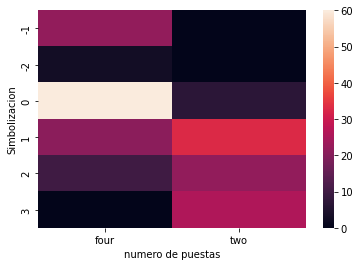

In [27]:
# Simbolizacion vs numero de puertas
sim_numpuertas = pd.crosstab(df_cuali['Simbolizacion'], df_cuali['numero de puestas'])
sns.heatmap(sim_numpuertas)

La modalidad mas frecuente es de los automoviles con cuatro puertas y simbolización de 0. Las menor frecuentes para este número de puertas es la simbolización 3 y -2. Por otra parte, para los automoviles con dos puertas, los mas frecuente es tener simbolización 1 mientras que lo menos ocurrido es que tengan simbolización -1.

In [28]:
# tipo de combustible vs	tipo de motor
com_motor = pd.crosstab(df_cuali['tipo de combustible'], df_cuali['tipo de motor'])
sns.heatmap(com_motor)

La combinación de tipo de motor y tipo de combustible mas frecuentes son, tipo de motor ohc con tipo de combustible gas.

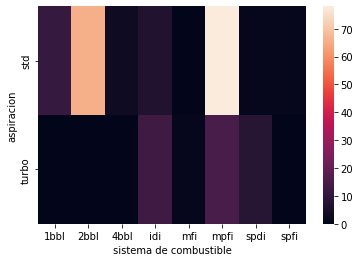

In [29]:
# aspiracion VS	sistema de combustible
asp_sis = pd.crosstab(df_cuali['aspiracion'], df_cuali['sistema de combustible'])
sns.heatmap(asp_sis)

La combinación del sistema de combustible y aspiración mas frecuentes son, 2bbl - std y mpfi - std.

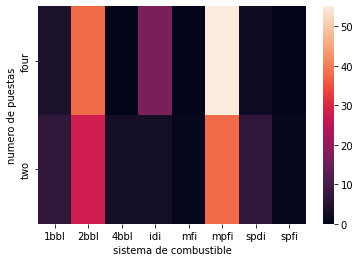

In [30]:
# numero de puertas	VS sistema de combustible
puer_com = pd.crosstab(df_cuali['numero de puestas'], df_cuali['sistema de combustible'])
sns.heatmap(puer_com)

La combinación de sistema de combustible y numero de puertas es, mpfi con cuatro puertas, seguido de 2bbl y mpfi cada una con dos y cuatro puertas y, por ultimo, idi con cuatro puertas.

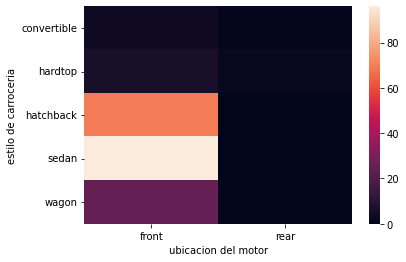

In [31]:
# estilo de carroceria VS	ubicacion del motor
est_ubi = pd.crosstab(df_cuali['estilo de carroceria'], df_cuali['ubicacion del motor'])
sns.heatmap(est_ubi)

Para la ubicación del motor tracero se tiene que es poco frecuente indiferentemente del estilo de la carroceria, por otra parte, para la ubicación del motor alfrente, lo mas frecuente es que el estilo de carroceria sea Sedan.

In [32]:
# ruedas motrices	vs tipo de motor
rue_motor = pd.crosstab(df_cuali['ruedas motrices'], df_cuali['tipo de motor'])
sns.heatmap(rue_motor)

La unica combinación de tipi de motor y ruedad motrices con frecuencias relevantes son, tipo de motor ohc con ruedad motrices fwd y rwd.

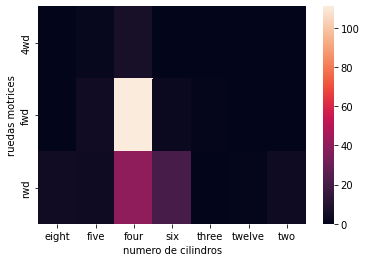

In [33]:
# tipo de motor	vs numero de cilindros
motor_cilindro = pd.crosstab(df_cuali['ruedas motrices'], df_cuali['numero de cilindros'])
sns.heatmap(motor_cilindro)

Lo mas frecuente es encontrar número de cilindros con ruedas motrices fwd, seguido de encontrarlo con ruedas motrices rwd. Tambien es frecuente encontrar automoviles con numero de cilindros seis y ruedas motrices rwd.

## **Análisis de variables cuantitativas**

In [34]:
df_cuant = df_Aut.loc[:,['perdidas','distancia entre ejes','longitud', 'ancho', 'altura', 'peso en orden de marcha','tamaño del motor','diametro', 'carrera',
       'relacion de compresion', 'caballos de fuerza', 'rmp pico',
       'millas por galon ', 'carretera', 'precio']]
df_cuant.head()

perdidas  distancia entre ejes  longitud  ancho  altura  \
0       122                  88.6     168.8   64.1    48.8   
1       122                  94.5     171.2   65.5    52.4   
2       164                  99.8     176.6   66.2    54.3   
3       164                  99.4     176.6   66.4    54.3   
4       122                  99.8     177.3   66.3    53.1   

   peso en orden de marcha  tamaño del motor  diametro  carrera  \
0                     2548               130      3.47     2.68   
1                     2823               152      2.68     3.47   
2                     2337               109      3.19     3.40   
3                     2824               136      3.19     3.40   
4                     2507               136      3.19     3.40   

   relacion de compresion  caballos de fuerza  rmp pico  millas por galon   \
0                     9.0               111.0    5000.0                 21   
1                     9.0               154.0    5000.0                 19   
2                    10.0               102.0    5500.0                 24   
3                     8.0               115.0    5500.0                 18   
4                     8.5               110.0    5500.0                 19   

   carretera   precio  
0         27  16500.0  
1         26  16500.0  
2         30  13950.0  
3         22  17450.0  
4         25  15250.0

In [35]:
df_cuant['precio'].describe()

count      204.0000
mean     13205.6900
std       7888.0996
min       5118.0000
25%       7784.7500
50%      10470.0000
75%      16500.0000
max      45400.0000
Name: precio, dtype: float64

In [36]:
100*7888.0996/13205.6900

59.73258194005765

El precio de lo autos observado en la muestra, abarca desde los 5118 dolares hasta los 45400dolares, el 50% del precio de los autos observados es a lo sumo 10470 dolaresa, mientras que para el 50% restante este es el precio menor. En promedio los automoviles tiene un costo de 13205 dolares. Ademas se tiene que, en cuanto la disperción el coeficiente de variación arroja un valor de aproximadamente 60%, lo cual indica la variacion que presenta la muestra respecto al promedio. Puede considerarse como alta. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fece67c2250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fece67c2cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fece67bdc90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fece67c87d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fece67c8d10>],
 'means': []}

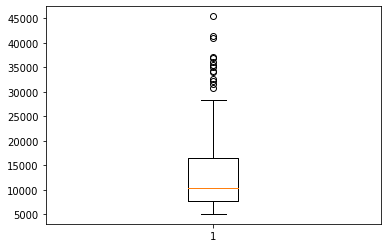

In [37]:
plt.boxplot(df_cuant['precio'])


In [38]:
df_cuant['precio'].plot.density(color='blue') 
plt.title('Densidad del precio') 
plt.show()

Se observa la posible presencia de valores atípicos para precios superiores a 30000 dólares, tanto en el boxplot como en el gráfico de densidad, se observa que el precio de los automóviles tiene una distribución asimétrica positiva. Lo cual indica que es más frecuente encontrar autos de precios más bajos. 

### **Análisis de variables conjuntas**

In [39]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [40]:
c = df_cuant.corr()

In [41]:
var_cuan_imp = list((((abs(c) > 0.7) * 1).sum(axis = 1) > 2).index)

In [42]:
var_cuan_imp = ((abs(c) > 0.7) * 1).sum(axis = 1)

In [43]:
lista_cuan = list(var_cuan_imp[var_cuan_imp > 2].index)

Se incluyeron en el analisis unicamente las variables que tengan dos o mas correlaciones que sean mayores a 0.7 en valor absoluto.

In [44]:
var_cuan_1 = df_Aut.loc[:,lista_cuan]

In [45]:
var_cuan_1

distancia entre ejes  longitud  ancho  peso en orden de marcha  \
0                    88.6     168.8   64.1                     2548   
1                    94.5     171.2   65.5                     2823   
2                    99.8     176.6   66.2                     2337   
3                    99.4     176.6   66.4                     2824   
4                    99.8     177.3   66.3                     2507   
..                    ...       ...    ...                      ...   
199                 109.1     188.8   68.9                     2952   
200                 109.1     188.8   68.8                     3049   
201                 109.1     188.8   68.9                     3012   
202                 109.1     188.8   68.9                     3217   
203                 109.1     188.8   68.9                     3062   

     tamaño del motor  caballos de fuerza  millas por galon   carretera  \
0                 130               111.0                 21         27   
1                 152               154.0                 19         26   
2                 109               102.0                 24         30   
3                 136               115.0                 18         22   
4                 136               110.0                 19         25   
..                ...                 ...                ...        ...   
199               141               114.0                 23         28   
200               141               160.0                 19         25   
201               173               134.0                 18         23   
202               145               106.0                 26         27   
203               141               114.0                 19         25   

      precio  
0    16500.0  
1    16500.0  
2    13950.0  
3    17450.0  
4    15250.0  
..       ...  
199  16845.0  
200  19045.0  
201  21485.0  
202  22470.0  
203  22625.0  

[204 rows x 9 columns]

In [46]:
matriz_correlacion = var_cuan_1.corr()

In [47]:
matriz_correlacion

distancia entre ejes  longitud     ancho  \
distancia entre ejes                 1.000000  0.877612  0.795115   
longitud                             0.877612  1.000000  0.841199   
ancho                                0.795115  0.841199  1.000000   
peso en orden de marcha              0.781763  0.878090  0.868493   
tamaño del motor                     0.573989  0.683830  0.737042   
caballos de fuerza                   0.355907  0.555076  0.644075   
millas por galon                    -0.479633 -0.673251 -0.647177   
carretera                           -0.552897 -0.706635 -0.681169   
precio                               0.587607  0.683372  0.730130   

                         peso en orden de marcha  tamaño del motor  \
distancia entre ejes                    0.781763          0.573989   
longitud                                0.878090          0.683830   
ancho                                   0.868493          0.737042   
peso en orden de marcha                 1.000000          0.850611   
tamaño del motor                        0.850611          1.000000   
caballos de fuerza                      0.751035          0.810718   
millas por galon                       -0.758238         -0.654101   
carretera                              -0.798088         -0.677775   
precio                                  0.820831          0.861753   

                         caballos de fuerza  millas por galon   carretera  \
distancia entre ejes               0.355907          -0.479633  -0.552897   
longitud                           0.555076          -0.673251  -0.706635   
ancho                              0.644075          -0.647177  -0.681169   
peso en orden de marcha            0.751035          -0.758238  -0.798088   
tamaño del motor                   0.810718          -0.654101  -0.677775   
caballos de fuerza                 1.000000          -0.803498  -0.771064   
millas por galon                  -0.803498           1.000000   0.971311   
carretera                         -0.771064           0.971311   1.000000   
precio                             0.757943          -0.668021  -0.690937   

                           precio  
distancia entre ejes     0.587607  
longitud                 0.683372  
ancho                    0.730130  
peso en orden de marcha  0.820831  
tamaño del motor         0.861753  
caballos de fuerza       0.757943  
millas por galon        -0.668021  
carretera               -0.690937  
precio                   1.000000

In [48]:
sns.heatmap(matriz_correlacion,cmap="BrBG",annot=True)

En el mapa de calor anterior, se observa que en general, casi todas las variables que se incluyeron en el análisis están correlacionadas ya sea de manera directamente proporcional o de forma inversa, lo cual, no es del todo bueno, dado que, para la estimación del precio del automóvil se busca que las variables están fuertemente correlacionadas con la variable de interés, pero no entre ellas, dado que, esto podría presentar problemas de multicolinealidad en la estimación posterior de los modelos.

In [49]:
pd.DataFrame(c['precio'], ).sort_values('precio')

precio
carretera               -0.690937
millas por galon        -0.668021
rmp pico                -0.100833
relacion de compresion   0.071058
carrera                  0.083115
perdidas                 0.133999
altura                   0.136123
diametro                 0.532562
distancia entre ejes     0.587607
longitud                 0.683372
ancho                    0.730130
caballos de fuerza       0.757943
peso en orden de marcha  0.820831
tamaño del motor         0.861753
precio                   1.000000

En cuanto a la asociación de las variables con el precio del automovil, se obtuvo que las unicas variables que no tienen asociación moderada o fuerte con el precio es RMP pico, relación de compresión, perdidas y altura. Las variables carretera, millas por galon presentan una relación inversamente proporcional con el precio del automovil. Por otra parte, las variables diametro, distancia entre ejes, longitud, ancho, caballos de fuerza, peso en orden de marcha y tamaño del motor presentan asociación positiva con el precio, siendo las asociaciones más fuertes con el peso en orden de marcha y tamaño del motor.

In [50]:
sns.pairplot(var_cuan_1, diag_kind = 'hist', corner = True)

# **Análisis de variables conjuntas**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


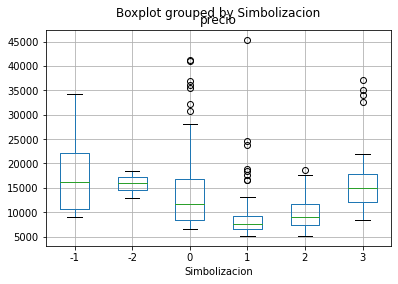

In [51]:
df_Aut.loc[:,['precio','Simbolizacion']].boxplot(column= 'precio', by = 'Simbolizacion')

In [52]:
df_Aut.loc[:,['precio','marca']].boxplot(column= 'precio', by = 'marca')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [53]:
df_Aut.loc[:,['precio','tipo de combustible']].boxplot(column= 'precio', by = 'tipo de combustible')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


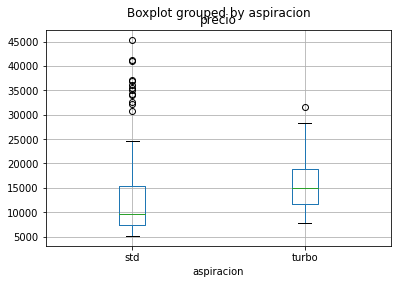

In [54]:
df_Aut.loc[:,['precio','aspiracion']].boxplot(column= 'precio', by = 'aspiracion')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


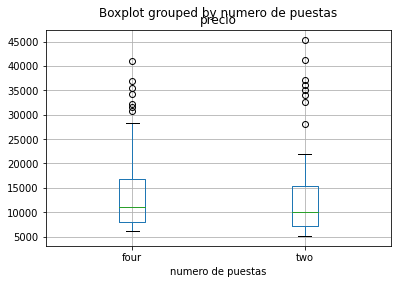

In [55]:
df_Aut.loc[:,['precio','numero de puestas']].boxplot(column= 'precio', by = 'numero de puestas')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


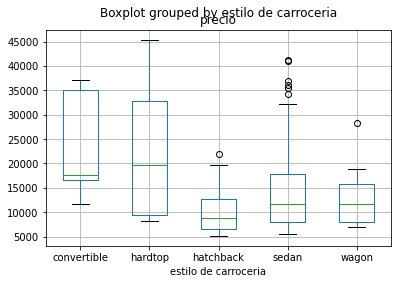

In [56]:
df_Aut.loc[:,['precio','estilo de carroceria']].boxplot(column= 'precio', by = 'estilo de carroceria')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


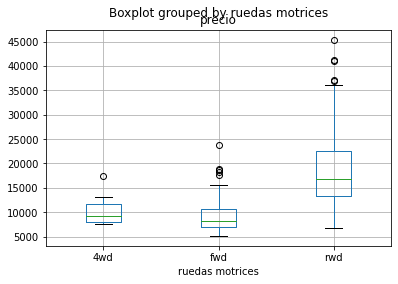

In [57]:
df_Aut.loc[:,['precio','ruedas motrices']].boxplot(column= 'precio', by = 'ruedas motrices')

In [58]:
df_Aut.loc[:,['precio','ubicacion del motor']].boxplot(column= 'precio', by = 'ubicacion del motor')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


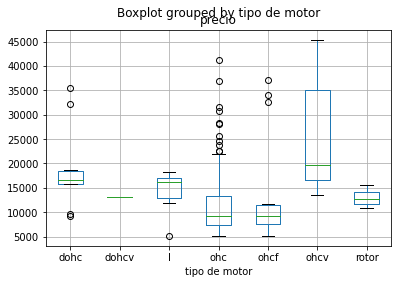

In [59]:
df_Aut.loc[:,['precio','tipo de motor']].boxplot(column= 'precio', by ='tipo de motor')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


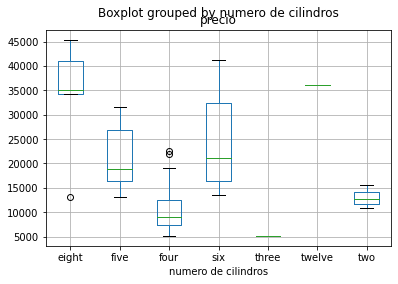

In [60]:
df_Aut.loc[:,['precio','numero de cilindros']].boxplot(column= 'precio', by ='numero de cilindros')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


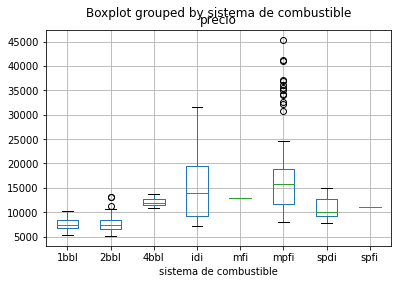

In [61]:
df_Aut.loc[:,['precio','sistema de combustible']].boxplot(column= 'precio', by ='sistema de combustible')

De los graficos observados previamente, de manera visual, se puede concluir que las unicas variables que no tienen relación con el precio son el tipo de combustible y el número de puertas, por lo tanto, no seran tenidas en cuenta para la predicción del precio del automovil.